# Plotting


In this notebook we look at visualizing rhythmic segments. The package does not (currently) provide any plotting functionality. In fact, you hardly need any once you have organized your data in a convenient format. And that is precisely what the package does for you.

We will use rhythmic data from Roeske et al. (2020): inter-onset intervals for seperated instruments from a recording of Cuban Salsa & Son music, part of the Interpersonal Entrainment in Music Performance (IEMP) corpus (https://osf.io/37fws/).

In [1]:
import requests
from io import BytesIO
import scipy.io

# We load the data directly from Mendeley
url = "https://data.mendeley.com/public-files/datasets/s4cjj7h5sv/files/459bd50f-2e6d-43b0-807a-ffde2c126898/file_downloaded"
response = requests.get(url)
mat_contents = scipy.io.loadmat(BytesIO(response.content))
intervals = mat_contents['CubanSalsa_intervals_ms'].squeeze()
intervals

array([242.425, 239.653, 439.947, ..., 112.154, 117.026, 287.888],
      shape=(38222,))

## Pattern-duration plot

A pattern-duration plot shows both the pattern and the duration of each segment. For length-2 segments, the pattern can be identified with a single number: the relative duration of the first interval. For example, the segment $(2, 6)$ has pattern $(.25, .75)$ and can be represented using the first number, $0.25$.

In [2]:
import numpy as np
from rhythmic_segments import RhythmicSegments
import matplotlib.pyplot as plt

In [3]:
# Extract the segments of length 2, dropping the longest 5%
rs = (RhythmicSegments
       .from_intervals(intervals, length=2)
       .filter_by_duration(max_quantile=.95))

Text(0, 0.5, 'Duration (ms)')

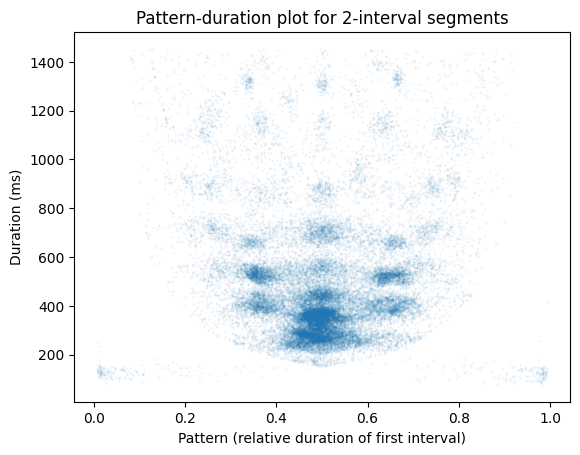

In [4]:
plt.scatter(x=rs.pat, y=rs.dur, s=.2, alpha=.1)
plt.title('Pattern-duration plot for 2-interval segments')
plt.xlabel('Pattern (relative duration of first interval)')
plt.ylabel('Duration (ms)')

Alternatively, you can use a hexbin plot to better visualize the density of points:

Text(0, 0.5, 'Duration (ms)')

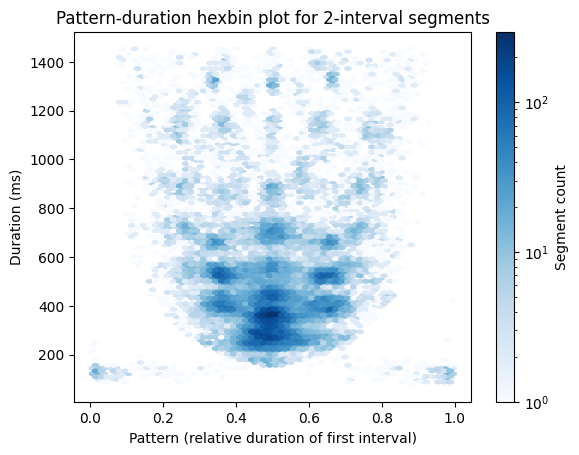

In [5]:
plt.hexbin(rs.ratio, rs.dur, gridsize=(60, 60), cmap='Blues', bins='log')
plt.colorbar(label='Segment count')
plt.title('Pattern-duration hexbin plot for 2-interval segments')
plt.xlabel('Pattern (relative duration of first interval)')
plt.ylabel('Duration (ms)')

## Phase plot

A phase plot (see e.g. Ravignani, 2017) shows all segments in a scatter plot, with the first interval on the x-axis and the second interval on the y-axis. This is only possible for length-2 segments.

Text(0.5, 1.0, 'Phase plot of 2-interval segments')

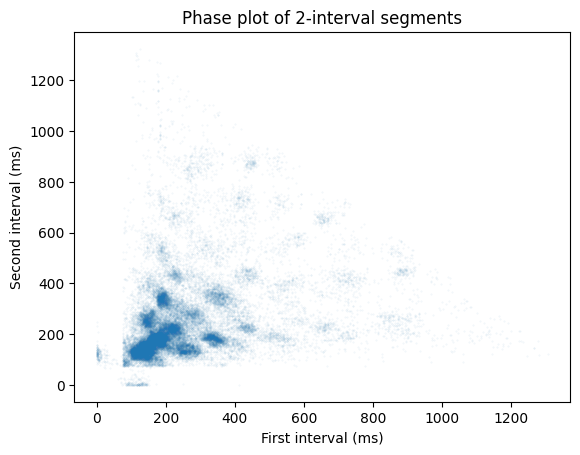

In [5]:
plt.scatter(x=rs.segments[:, 0], y=rs.segments[:, 1], s=.1, alpha=.1)
plt.xlabel('First interval (ms)')
plt.ylabel('Second interval (ms)')
plt.title('Phase plot of 2-interval segments')

## Triangle plot

Next, we look at visualizing patterns of length 3:

In [6]:
rs3 = (RhythmicSegments
       .from_intervals(intervals, length=3)
       .filter_by_duration(max_quantile=.95))

Patterns of length 3 live in a two dimensional simplex, which is a triangular space. 
We can easily visualize the distribution of length-3 segments using the [matpltern](https://mpltern.readthedocs.io) package.

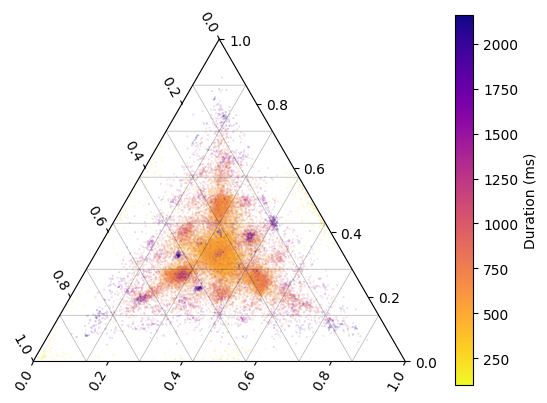

In [7]:
import mpltern # noqa: F401
from matplotlib.colors import Normalize
from mpltern.datasets import get_triangular_grid

# Use a linear color map to visualize segment duration
cmap = plt.get_cmap('plasma_r')
norm = Normalize(vmin=np.min(rs3.durations), vmax=np.max(rs3.durations))
colors = cmap(norm(rs3.durations))

# Scatterplot in ternary plot
ax = plt.subplot(projection="ternary")
top, left, right = rs3.patterns.T
ax.scatter(top, left, right, c=colors, s=.02, alpha=.5)

# Add triangular grid
ax.triplot(*get_triangular_grid(8), 'k-', lw=.5, alpha=0.3)

# Show colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed for colorbar to work
plt.colorbar(sm, ax=ax, label='Duration (ms)', pad=0.1)


Alternatively, you can use a tribin (or hexbin) plot to visualize density of segments in pattern space, but then you cannot visualize duration at the same time.

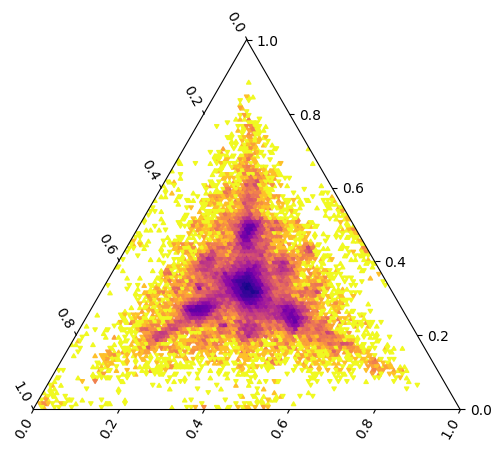

In [8]:
ax = plt.subplot(projection="ternary")
top, left, right = rs3.patterns.T
ax.tribin(top, left, right, bins="log", cmap="plasma_r")

## References

Ravignani, A. (2017). Visualizing and Interpreting Rhythmic Patterns Using Phase Space Plots. Music Perception, 35(5), 557–568. https://doi.org/10.1525/mp.2017.34.5.557

Roeske, Tina; Jacoby, Nori (2020), “Musical rhythm: Onsets/intervals of seven music corpora”, Mendeley Data, V2, https://doi.org/10.17632/s4cjj7h5sv.2

Roeske, T. C., Tchernichovski, O., Poeppel, D., & Jacoby, N. (2020). Categorical Rhythms Are Shared between Songbirds and Humans. Current Biology, 30(18), P3544-3555.e6. https://doi.org/10.1016/j.cub.2020.06.072

